<a href="https://colab.research.google.com/github/AdityaGita/group_project_video_game_sales_analysis/blob/main/Group_Project_Video_Games_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OVERVIEW**
You work for the **online store Ice**, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and **plan advertising campaigns**. In front of you is data going back to 2017. Let’s imagine that it’s January 2017 and **you’re planning a campaign** for next month in 2017.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = 'https://drive.google.com/file/d/1vdoe0KQQt2xLY0VZnp3R6VbzBmDOuiIG/view?usp=sharing'
dt = 'https://drive.google.com/uc?id=' + dt.split('/')[-2]
dt = pd.read_csv(dt)
dt.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [ ]:
pl = 'https://docs.google.com/spreadsheets/d/1MA3B_Dj-NFyaTNNhGO3HVIUtSlqRWJMs33w7MlwyHH0/edit#gid=0'
pl = pl.replace('/edit#gid=', '/export?format=csv&gid=')
pl = pd.read_csv(pl)
pl.head()

,Platform,Manufacturer
0,DS,Nintendo
1,PS2,Playstation
2,PS3,Playstation
3,Wii,Nintendo
4,PSP,Playstation


In [ ]:
df =  dt.merge(pl, on='Platform', how ='left')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Manufacturer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E,Nintendo
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17416 entries, 0 to 17415
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
 15  Manufacturer     17416 non-null  object 
dtypes: float64(10), object(6)
memory usage: 2.3+ MB


In [ ]:
df.rename(columns={'Year_of_Release': 'Year'}, inplace = True)

In [ ]:
df.shape

(17416, 16)

In [ ]:
df.isnull().sum()

Name               0
Platform           0
Year               8
Genre              0
Publisher          1
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    9080
Critic_Count    9080
User_Score      9618
User_Count      9618
Rating          7164
Manufacturer       0
dtype: int64

In [ ]:
df.dropna(subset=['Year','Publisher'], inplace=True)

In [ ]:
df.isnull().sum()

Name               0
Platform           0
Year               0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    9073
Critic_Count    9073
User_Score      9610
User_Count      9610
Rating          7158
Manufacturer       0
dtype: int64

**Year has the dtype as float, so we will convert that to int**

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating', 'Manufacturer'],
      dtype='object')



---



In [ ]:
df = df[df['Year']>=1991]
df.shape

(17171, 16)

In [ ]:
len(df[df['Year'] <= 1990])/len(df)*100

0.0

## Variable identification

**Categorical variables**
  * Platform
  * Year
  * Genre
  * Publisher

**Numerical variables**
  * NA_Sales
  * EU_Sales
  * JP_Sales
  * Other_Sales
  * Global_Sales


### Platform

In [ ]:
df['Platform'].value_counts().to_dict().keys()

dict_keys(['DS', 'PS2', 'PS3', 'Wii', 'PSP', 'X360', 'PS', 'PC', 'GBA', 'X', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', 'G', 'DC', 'GEN', 'NES', 'NG', 'WS', 'SCD', '3DO', 'TG16', '2600', 'GG', 'PCFX'])

**There are total of 31 platforms**
**let's take a look at the top five platforms**

In [ ]:
platforms = list(df['Platform'].value_counts()[:5].to_dict().keys())
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
global_sales = []
na_sales = []
eu_sales = []
jp_sales = []
other_sales = []
for platform in platforms:
  global_sales.append(df[df['Platform'] == platform]['Global_Sales'].sum())
  na_sales.append(df[df['Platform'] == platform]['NA_Sales'].sum())
  eu_sales.append(df[df['Platform'] == platform]['EU_Sales'].sum())
  jp_sales.append(df[df['Platform'] == platform]['JP_Sales'].sum())
  other_sales.append(df[df['Platform'] == platform]['Other_Sales'].sum())
  

**Let's plot some graphs to know the sales figures for the top five platform**

In [ ]:
explode = [0.1,0.1,0.1,0.1,0.1]
colors = ['lightseagreen', 'mediumpurple', 'aquamarine', 'lawngreen', 'mediumorchid']
def platform_pie(title, sales):
  plt.title(title)
  plt.pie(sales, 
          labels = platforms,
          wedgeprops=dict(width=0.2),
          shadow = True,
          colors = colors, 
          explode = explode, 
          startangle = 90, 
          autopct='%1.1f%%');

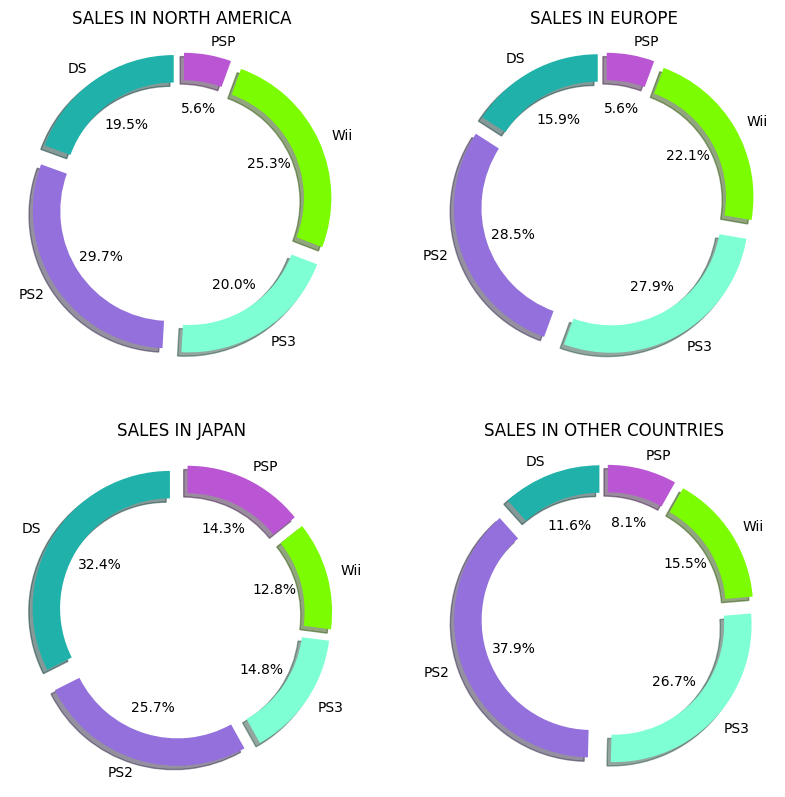

In [ ]:
plt.figure(figsize= (10,10), dpi = 100)

plt.subplot(2,2,1)
platform_pie('Sales in North America'.upper(), na_sales)

plt.subplot(2,2,2)
platform_pie('Sales in Europe'.upper(), eu_sales)

plt.subplot(2,2,3)
platform_pie('Sales in Japan'.upper(), jp_sales)

plt.subplot(2,2,4)
platform_pie('Sales in Other countries'.upper(), other_sales)

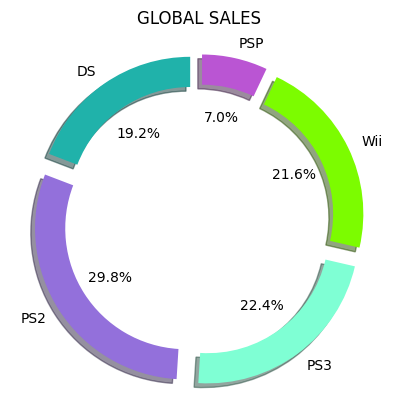

In [ ]:
plt.figure(figsize= (5,5), dpi = 100)
platform_pie('Global Sales'.upper(), global_sales)

In [ ]:
platform_global_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_global_sales = platform_global_sales.sort_values('Global_Sales', ascending= False)
platform_global_sales.head()

,Platform,Global_Sales
16,PS2,1256.09
29,X360,975.43
17,PS3,943.29
26,Wii,910.14
4,DS,808.80


In [ ]:
global_sales

[808.8000000000001, 1256.09, 943.29, 910.14, 295.67]

### Summary Platform
* PS2 and PS3 are two dominant platforms overall
* among these two, PS2 has more sales than PS3 in North America and Japan, whereas PS3 has more sales in Europe



---



### Year

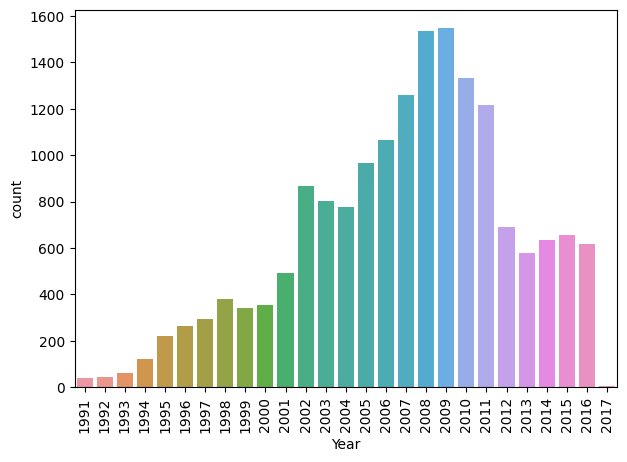

In [ ]:
plt.figure(figsize= (7,5), dpi= 100)
plt.xticks(rotation = 90)
sns.countplot(x = 'Year', data = df);

In [ ]:
# let's define a function to plot the graphs
def Year_plots(title, sales, color):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.lineplot(x = 'Year', 
              y = sales,
              color = color, 
              data = df)

**Let's see in which year most sales were made**

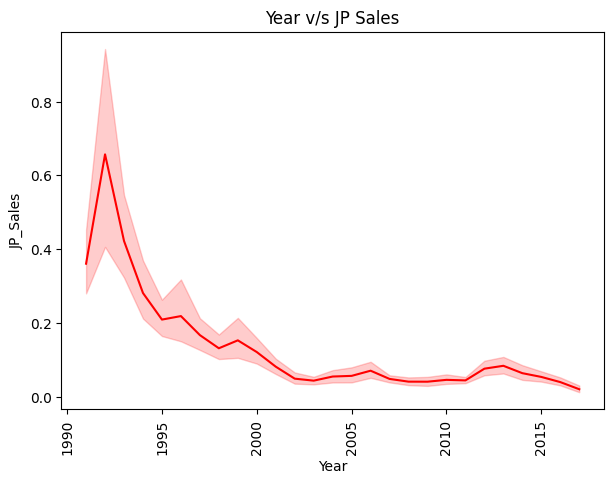

In [ ]:
Year_plots('Year v/s JP Sales', 'JP_Sales', 'red')

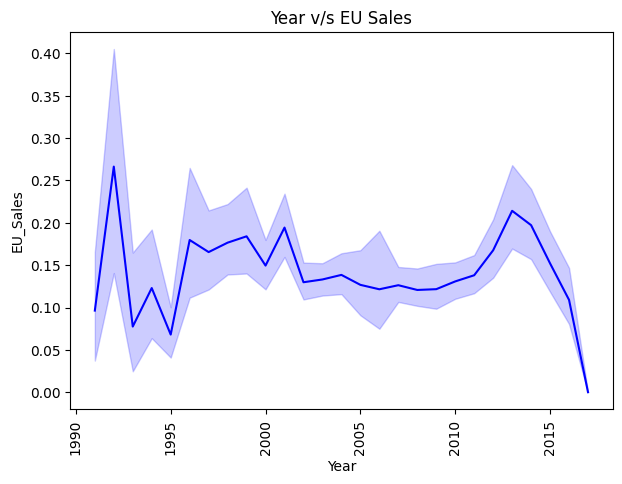

In [ ]:
Year_plots('Year v/s EU Sales', 'EU_Sales', 'blue')

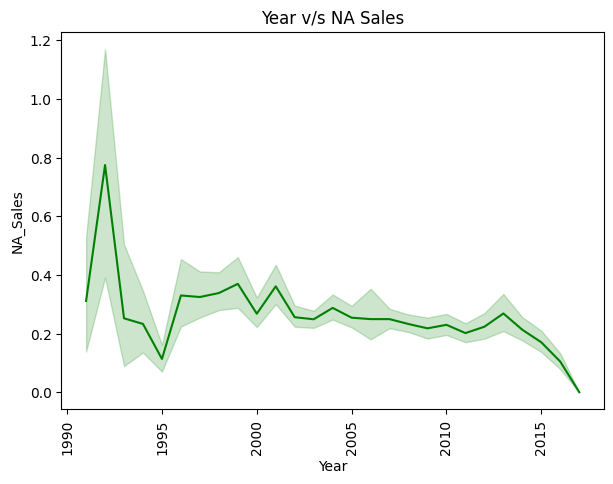

In [ ]:
Year_plots('Year v/s NA Sales', 'NA_Sales', 'green')

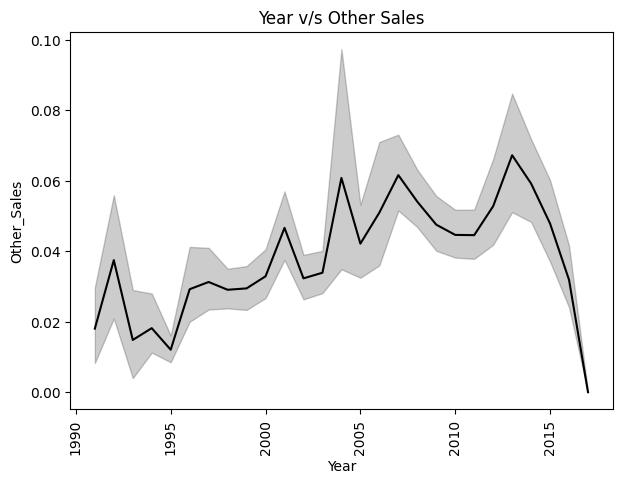

In [ ]:
Year_plots('Year v/s Other Sales', 'Other_Sales', 'black')

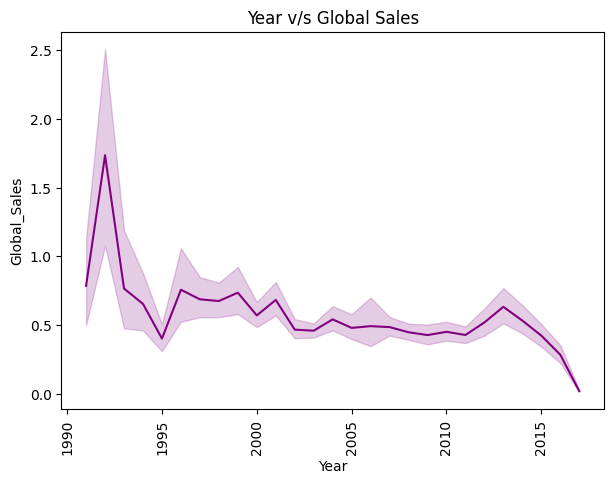

In [ ]:
Year_plots('Year v/s Global Sales', 'Global_Sales', 'purple')

**More sales in all the categories were made in the years 1984, 1985, 1988,1989,1990 and 1992**



---



### Genre


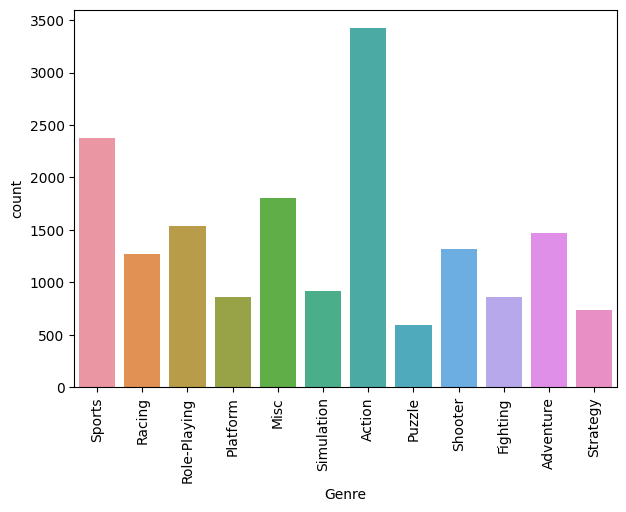

In [ ]:
plt.figure(figsize=(7,5), dpi = 100)
plt.xticks(rotation = 90)
sns.countplot(x = 'Genre', data = df);

### Summary Genre 1
Jumlah Genre Game yang ada di dataset
<p>
**We have more number of games from the genres 'Action' and 'Sports' in our dataset**

In [ ]:
# function to plot graphs 
def genre_plots(title, sales, palette):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.barplot(x = 'Genre', 
              y = sales,
              data = df, 
              palette = palette)

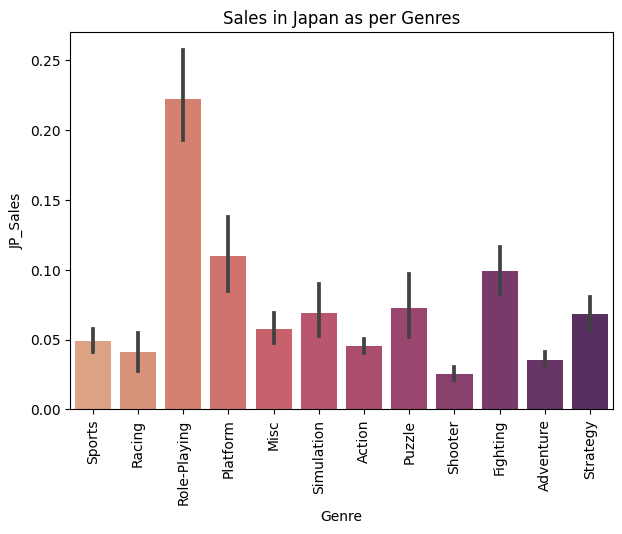

In [ ]:
genre_plots('Sales in Japan as per Genres', 'JP_Sales', 'flare')

### Summary Genre 2
<p>**Video games of Genre 'Role-Playing' has made the most sales in Japan**

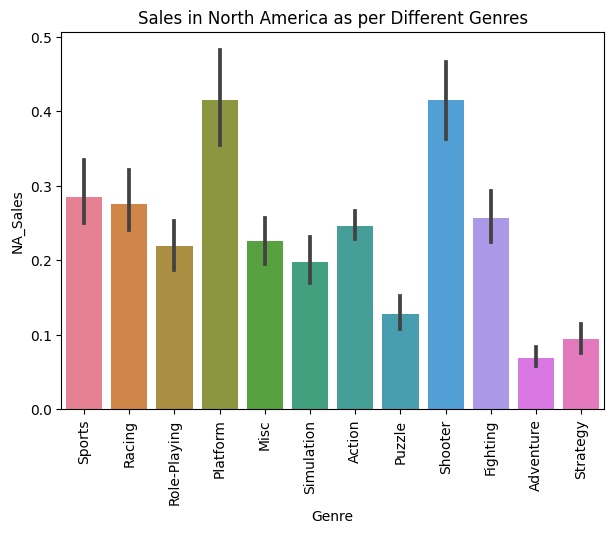

In [ ]:
genre_plots('Sales in North America as per Different Genres', 'NA_Sales', 'husl')

### Summary Genre 3
<p>
**In case of North America, the genres 'Platform' and 'Shooter' as have made more sales than other genres**

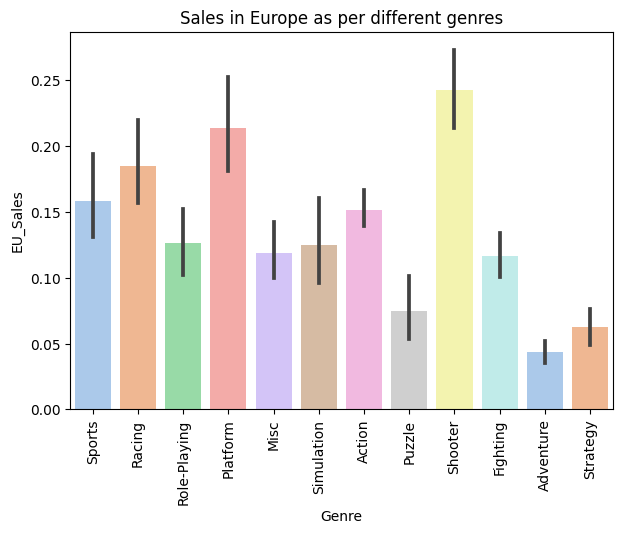

In [ ]:
genre_plots('Sales in Europe as per different genres', 'EU_Sales', 'pastel')

### Summary Genre 4
<p>
**The sales in Europe as similar to sales in North America. 'Platform' and 'Shooter' genre have made more sales than other genres**

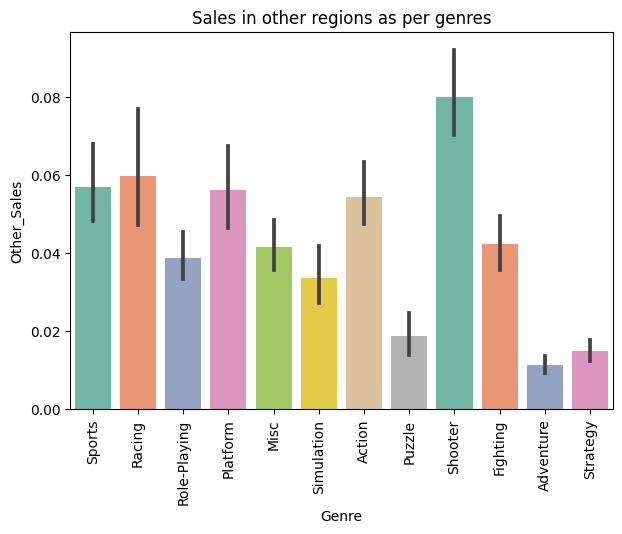

In [ ]:
genre_plots('Sales in other regions as per genres', 'Other_Sales', 'Set2')

### Summary Genre 5
<p>
**In other regions, genres 'Racing' and 'Shooter' have more sales**



---



### Publisher

In [ ]:
df['Publisher'].value_counts()[:10]

Electronic Arts                 1380
Activision                       977
Ubisoft                          970
Namco Bandai Games               957
Konami Digital Entertainment     858
THQ                              728
Sony Computer Entertainment      704
Nintendo                         667
Sega                             658
Take-Two Interactive             433
Name: Publisher, dtype: int64

In [ ]:
len(df['Publisher'].unique())

604

**There are 607 publishers in total**

**lets take a look at the total and average global sales figures of top 10 publishers**

In [ ]:
# lets take a look at the total and average global sales figures of top 10 publishers
publishers = list(df['Publisher'].value_counts()[:10].to_dict().keys())
total_sales = []
average_sales = []
for publisher in publishers:
  total_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].sum())
  average_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].mean())
my_dict = {
    'publishers': publishers,
    'total_sales': total_sales,
    'average_sales': average_sales
}

publisher_df = pd.DataFrame(my_dict)
publisher_df

,publishers,total_sales,average_sales
0,Electronic Arts,1132.43,0.820601
1,Activision,720.74,0.737707
2,Ubisoft,477.30,0.492062
3,Namco Bandai Games,241.78,0.252644
4,Konami Digital Entertainment,277.01,0.322855
5,THQ,345.51,0.474602
6,Sony Computer Entertainment,614.25,0.872514
7,Nintendo,1532.57,2.297706
8,Sega,269.19,0.409103
9,Take-Two Interactive,408.69,0.943857


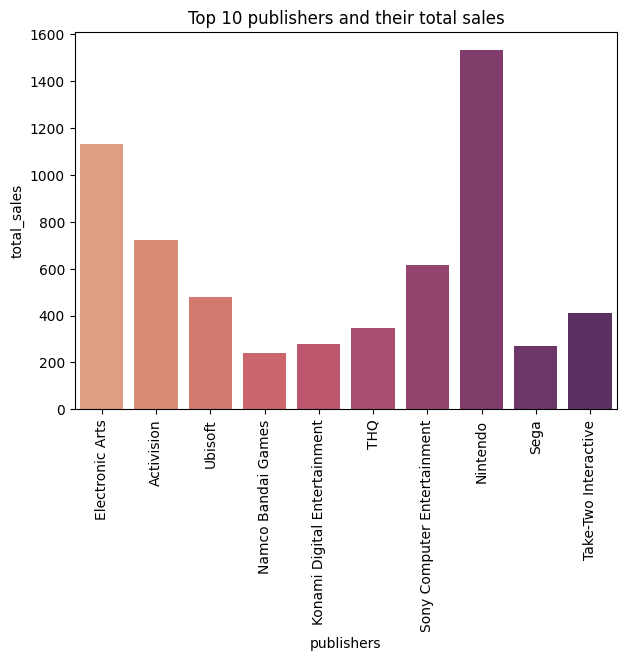

In [ ]:
plt.figure(figsize= (7,5), dpi = 100)

plt.title('Top 10 publishers and their total sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'total_sales', 
            data = publisher_df,
            palette = 'flare');

### Summary Publisher 1
<p> 
**Nintendo, Electronic Arts and Activision are the top three companies with highest total sales for global sales**

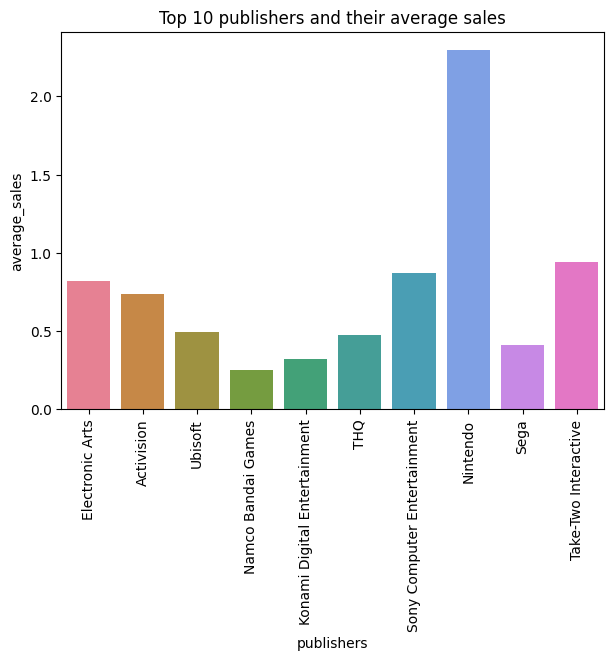

In [ ]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Top 10 publishers and their average sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'average_sales', 
            data = publisher_df,
            palette = 'husl');

**Nintendo, Take-Two Interactive and Sony Computer Entertainment are the top three companies with highest average sales**



---



## Numerical Varibles

**Let's take a look at which region has the highest total sales**

In [ ]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
total = []
average = []
for sales_col in sales_cols:
  total.append(df[sales_col].sum())
  average.append(df[sales_col].mean())

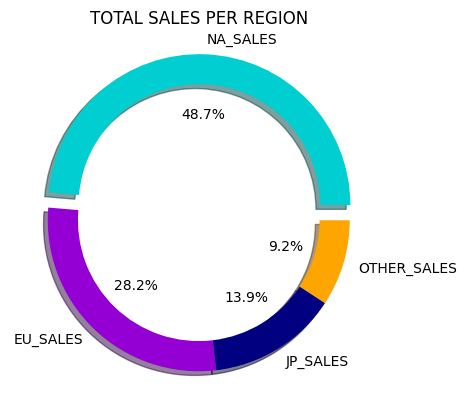

In [ ]:
explode = [0.1,0.0,0,0]
plt.figure(figsize=(7,5), dpi = 100)


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

colors = ['darkturquoise', 'darkviolet', 'navy', 'orange']
plt.title('Total Sales per region'.upper())
plt.pie(total, 
        labels = [i.upper() for i in sales_cols], 
        explode = explode, 
        shadow = True,
        colors = colors, 
        wedgeprops=dict(width=0.2),
        autopct='%1.1f%%');

### Summary Contribution Video Game Sales
**North America region has the highest number of total sales and highest average number of sales as well**



---

---





# Asking and Answering questions

### **which are the top-selling games in each genre in each region and globally?**

In [ ]:
# let's define a function for it 
# this function will return a dataframe containing the highest saling video games in each genre for a given region 
def highest_genre(df,region_sales): 
  name_list = []
  genre_list = list(df['Genre'].value_counts().to_dict().keys())
  sale_list = []

  for genre in genre_list: 
    name_list.append(df[df['Genre'] == genre][['Name', region_sales]].sort_values(region_sales, ascending = True)['Name'].iloc[-1])
    sale_list.append(df[df['Genre'] == genre][['Name', region_sales]].sort_values(region_sales, ascending = True)[region_sales].iloc[-1])

  gs_dict = {
      'Name': name_list,
      'Genre': genre_list,
      'Sales': sale_list
  }

  return pd.DataFrame(gs_dict, index= list(range(1, len(genre_list) + 1)))

In [ ]:
print('The highest selling video games in each genre for every region are: \n'.upper())
regions = ['North America', 'Europe', 'Japan', 'Other regions']
i = 0
for col in sales_cols:
  print(regions[i])
  i = i + 1
  print(highest_genre(df, col))
  print('\n')

THE HIGHEST SELLING VIDEO GAMES IN EACH GENRE FOR EVERY REGION ARE: 

North America
                                           Name         Genre  Sales
1                            Grand Theft Auto V        Action   9.66
2                                    Wii Sports        Sports  41.36
3                            Kinect Adventures!          Misc  15.02
4                      Pokemon Red/Pokemon Blue  Role-Playing  11.27
5            Super Mario Land 2: 6 Golden Coins     Adventure   6.16
6                       Call of Duty: Black Ops       Shooter   9.73
7                                Mario Kart Wii        Racing  15.68
8                                    Nintendogs    Simulation   9.05
9                     New Super Mario Bros. Wii      Platform  14.48
10                      Super Smash Bros. Brawl      Fighting   6.64
11                              Pokemon Stadium      Strategy   3.18
12  Brain Age 2: More Training in Minutes a Day        Puzzle   3.43


Europe
          

### **Which platforms have sold video games of all the genre types?**

In [ ]:
genre_table = pd.pivot_table(df, 
                             index = 'Platform', 
                             columns = ['Genre'],
                             values= ['NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'], 
                             aggfunc= np.sum)
genre_table.dropna(inplace = True)
# print(list(genre_table.index))

**The platforms which have sold the video games of all the genres are:**
* 3DS
* DS
* GBA
* GC
* N64
* PC
* PS
* PS2
* PS3
* PS4
* PSP
* PSV
* SAT
* SNES
* Wii
* WiiU
* X360
* XB

### **The platforms which made highest sales for each genre in each region and how much**

In [ ]:
# this function is similar to highest_genre() function
def highest_platform(df, region_sales):
  name_list = []
  genre_list = list(df['Genre'].value_counts().to_dict().keys())
  sale_list = []

  for genre in genre_list: 
    name_list.append(df[df['Genre'] == genre][['Platform', region_sales]].sort_values(region_sales, ascending = True)['Platform'].iloc[-1])
    sale_list.append(df[df['Genre'] == genre][['Platform', region_sales]].sort_values(region_sales, ascending = True)[region_sales].iloc[-1])

  gs_dict = {
          'Platform': name_list,
          'Genre': genre_list,
          region_sales: sale_list
      }

  return pd.DataFrame(gs_dict, index= list(range(1, len(genre_list) + 1)))

In [ ]:
i = 0
print('The platforms which made highest sales for each genre in each region: \n'.upper())
for col in sales_cols:
  print(regions[i])
  i = i + 1
  print(highest_platform(df,col))
  print('\n')

THE PLATFORMS WHICH MADE HIGHEST SALES FOR EACH GENRE IN EACH REGION: 

North America
   Platform         Genre  NA_Sales
1      X360        Action      9.66
2       Wii        Sports     41.36
3      X360          Misc     15.02
4         G  Role-Playing     11.27
5         G     Adventure      6.16
6      X360       Shooter      9.73
7       Wii        Racing     15.68
8        DS    Simulation      9.05
9       Wii      Platform     14.48
10      Wii      Fighting      6.64
11      N64      Strategy      3.18
12       DS        Puzzle      3.43


Europe
   Platform         Genre  EU_Sales
1       PS3        Action      9.14
2       Wii        Sports     28.96
3        DS          Misc      9.20
4         G  Role-Playing      8.89
5        PC     Adventure      2.79
6       PS4       Shooter      5.95
7       Wii        Racing     12.80
8        DS    Simulation     10.95
9        DS      Platform      9.15
10      Wii      Fighting      2.56
11       PC      Strategy      2.27
12   

**Most no. of games were sold in the year 2009. let's explore that year**

In [ ]:
year_2009_df = df[df['Year'] == 2009] 
year_2009_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Manufacturer
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E,Nintendo
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,87.0,80.0,8.4,595.0,E,Nintendo
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,E,Nintendo
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.60,0.08,1.28,13.48,94.0,100.0,6.3,2702.0,M,Microsoft
47,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.34,2.71,3.96,0.76,11.77,NaN,NaN,NaN,NaN,NaN,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,Shinjuku no Ookami,PS2,2009,Action,Spike,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Playstation
17397,Tetsudou Seminar: Oote Shitetsuhen,DS,2009,Simulation,Taito,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Nintendo
17402,Virtua Tennis 2009,PC,2009,Sports,Sega,0.00,0.00,0.00,0.00,0.01,68.0,8.0,6.5,19.0,E,PC
17410,Nintama Rantarou: Nintama no Tame no Ninjutsu ...,DS,2009,Puzzle,Russel,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Nintendo


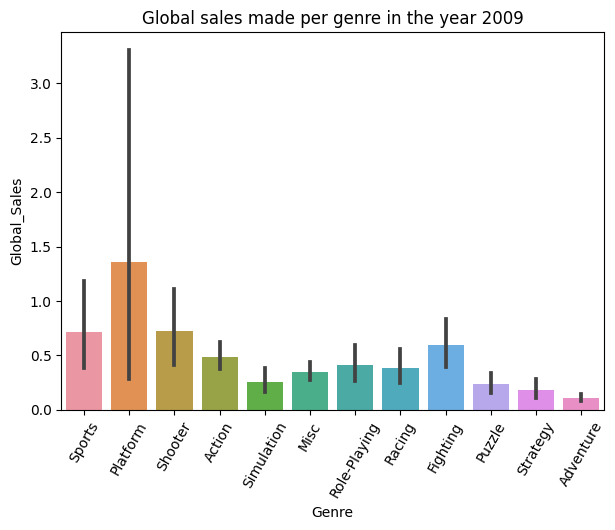

In [ ]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Global sales made per genre in the year 2009')
plt.xticks(rotation = 60)
sns.barplot(x = 'Genre', 
            y = 'Global_Sales', 
            data = year_2009_df);

**Electronic Arts is the company with most number of games sold in the dataset.**
**Let's explore this company's sales**

In [ ]:
df['Publisher'].value_counts()[:10]

Electronic Arts                 1380
Activision                       977
Ubisoft                          970
Namco Bandai Games               957
Konami Digital Entertainment     858
THQ                              728
Sony Computer Entertainment      704
Nintendo                         667
Sega                             658
Take-Two Interactive             433
Name: Publisher, dtype: int64

In [ ]:
ea_df = df[df['Publisher'] == 'Electronic Arts']
ea_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Manufacturer
75,FIFA 17,PS4,2016,Sports,Electronic Arts,0.90,6.75,0.09,1.33,9.07,85.0,41.0,4.9,442.0,E,Playstation
79,FIFA 16,PS4,2015,Sports,Electronic Arts,1.13,6.13,0.06,1.28,8.60,82.0,42.0,4.3,902.0,E,Playstation
83,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,3.11,3.56,0.22,1.32,8.21,NaN,NaN,NaN,NaN,NaN,Playstation
84,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.07,5.01,0.13,1.97,8.17,88.0,37.0,6.5,350.0,E,Playstation
88,The Sims 3,PC,2009,Simulation,Electronic Arts,0.99,6.42,0.00,0.60,8.01,86.0,75.0,7.6,894.0,T,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17164,Shogun: Total War,PC,2000,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,84.0,24.0,8.7,86.0,T,PC
17185,The Sims: Life Stories,PC,2007,Simulation,Electronic Arts,0.00,0.01,0.00,0.00,0.01,72.0,21.0,7.6,16.0,T,PC
17206,Black & White 2: Battle of the Gods,PC,2006,Strategy,Electronic Arts,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,PC
17248,Shonen Kininden Tsumuji,DS,2010,Adventure,Electronic Arts,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,Nintendo


In [ ]:
sales_cols
total_sales = []
average_sales = []
for col in sales_cols:
  total_sales.append(ea_df[col].sum())
  average_sales.append(ea_df[col].mean())
print(total_sales)
print(average_sales)

[608.48, 378.7, 14.430000000000003, 130.66]
[0.4409275362318829, 0.27442028985507017, 0.010456521739130404, 0.09468115942028929]


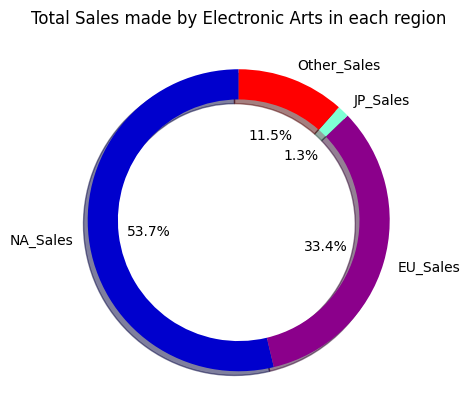

In [ ]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title("Total Sales made by Electronic Arts in each region")
colors = ['mediumblue', 'darkmagenta', 'aquamarine', 'red', 'lime']
plt.pie(total_sales, 
        labels = sales_cols,
        wedgeprops=dict(width=0.2),
        shadow = True,
        colors = colors,
        startangle = 90, 
        autopct='%1.1f%%');

In [ ]:
ea_df.groupby('Genre')[sales_cols + ['Global_Sales']].mean()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,0.292204,0.233817,0.013387,0.077957,0.616989
Adventure,0.182857,0.115714,0.006429,0.030714,0.335714
Fighting,0.509487,0.221538,0.000769,0.070000,0.802308
Misc,0.314681,0.152128,0.000213,0.056809,0.523830
Platform,0.200000,0.163125,0.003750,0.045625,0.413125
Puzzle,0.375714,0.201429,0.000000,0.065714,0.642857
Racing,0.475500,0.319812,0.007500,0.111250,0.913188
Role-Playing,0.511714,0.320000,0.076000,0.095143,1.002857
Shooter,0.598897,0.417379,0.022276,0.135724,1.174000


In [ ]:
ea_df.groupby('Genre')[sales_cols + ['Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,54.35,43.49,2.49,14.50,114.76
Adventure,2.56,1.62,0.09,0.43,4.70
Fighting,19.87,8.64,0.03,2.73,31.29
Misc,14.79,7.15,0.01,2.67,24.62
Platform,3.20,2.61,0.06,0.73,6.61
Puzzle,2.63,1.41,0.00,0.46,4.50
Racing,76.08,51.17,1.20,17.80,146.11
Role-Playing,17.91,11.20,2.66,3.33,35.10
Shooter,86.84,60.52,3.23,19.68,170.23


* **The genre 'Shooter' has made the highest average sales in each region except japan and globally as well** 
* **The genre 'Sports' has made the highest total sales in every region and globally as well.**
* **No games were sold by Electronic Arts by the genre 'Puzzle' in Japan**
* **In North America, the genre 'Adventure' made the lowest total sales and the genre 'Platform' made the lowest average sales.**
* **In Europe, the genre 'Puzzle' made the lowest sales.**

Let's Explore Rating that Populer in Each Region

In [ ]:
def rating_plots(title, sales, palette):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.barplot(x = 'Rating', 
              y = sales,
              data = df, 
              palette = palette)

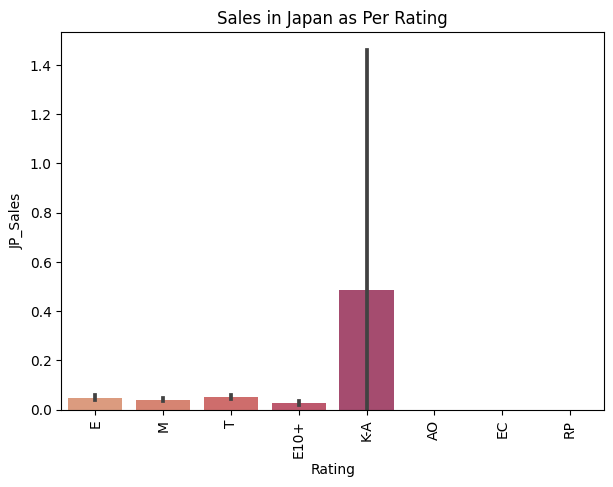

In [ ]:
rating_plots('Sales in Japan as Per Rating','JP_Sales','flare')

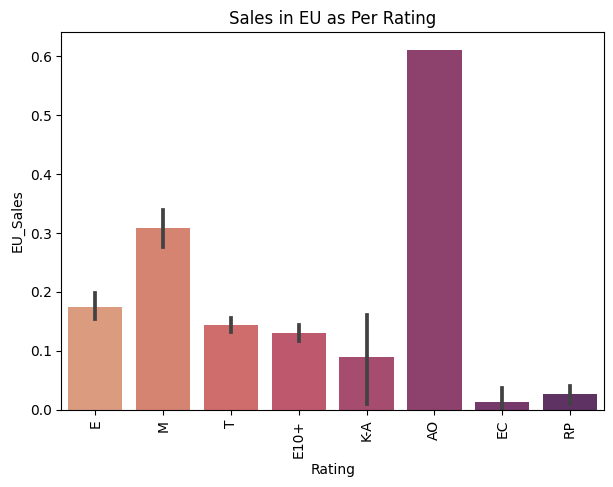

In [ ]:
rating_plots('Sales in EU as Per Rating','EU_Sales','flare')

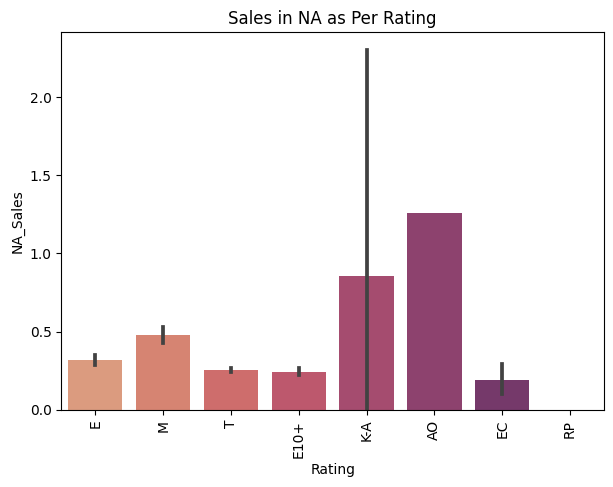

In [ ]:
rating_plots('Sales in NA as Per Rating','NA_Sales','flare')

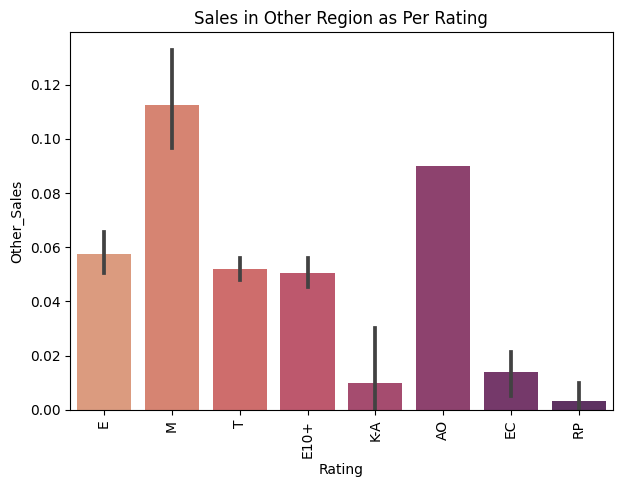

In [ ]:
rating_plots('Sales in Other Region as Per Rating','Other_Sales','flare')

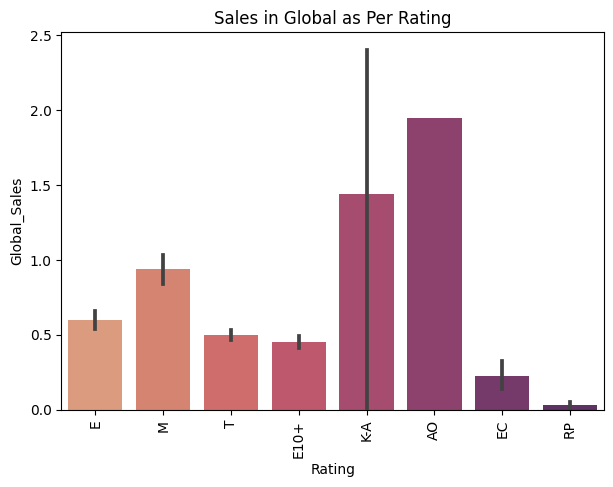

In [ ]:
rating_plots('Sales in Global as Per Rating','Global_Sales','flare')

In [ ]:
df['Rating'].isna().sum()/len(df)*100

40.31797798613942

Let's explore most populer manufacturer console for each region

In [ ]:
manufacturer = list(df['Manufacturer'].value_counts()[:5].to_dict().keys())
explode = [0.1,0.1,0.1,0.1,0.1]
colors = ['lightseagreen', 'mediumpurple', 'aquamarine', 'lawngreen', 'mediumorchid']
def manufacturer_pie(title, sales):
  plt.title(title)
  plt.pie(sales, 
          labels = manufacturer,
          wedgeprops=dict(width=0.2),
          shadow = True,
          colors = colors, 
          explode = explode, 
          startangle = 90, 
          autopct='%1.1f%%');

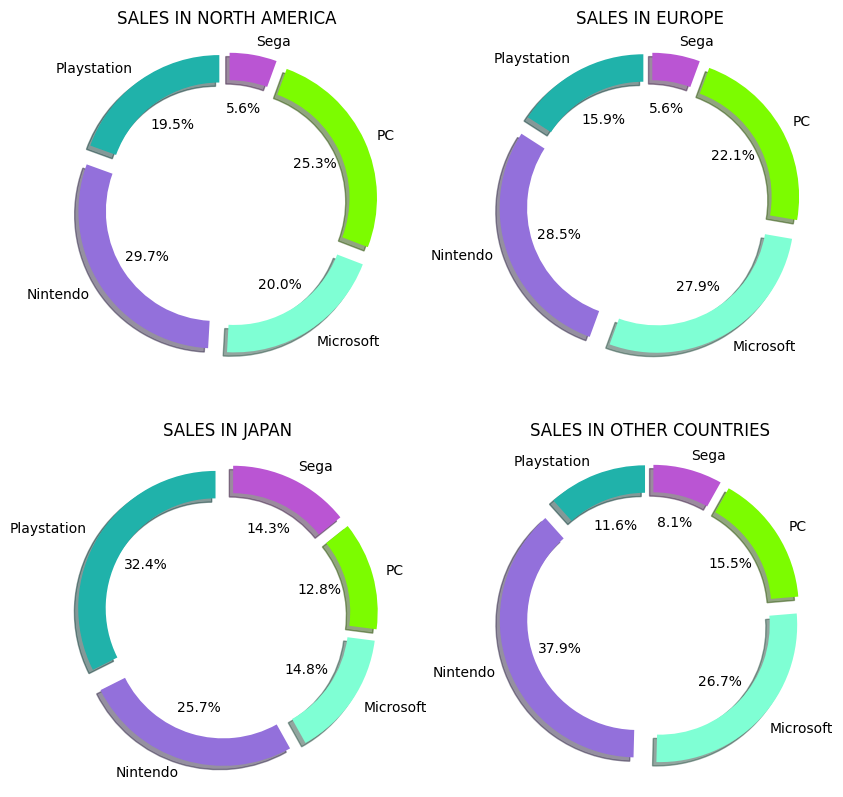

In [ ]:
plt.figure(figsize= (10,10), dpi = 100)

plt.subplot(2,2,1)
manufacturer_pie('Sales in North America'.upper(), na_sales)

plt.subplot(2,2,2)
manufacturer_pie('Sales in Europe'.upper(), eu_sales)

plt.subplot(2,2,3)
manufacturer_pie('Sales in Japan'.upper(), jp_sales)

plt.subplot(2,2,4)
manufacturer_pie('Sales in Other countries'.upper(), other_sales)

In [ ]:
df_sales_by_year = df.pivot_table(index = ['Year',
                                           'Manufacturer','Platform'], 
                                  values = 'Global_Sales', 
                                  aggfunc = 'sum').reset_index()
df_sales_by_year

,Year,Manufacturer,Platform,Global_Sales
0,1991,Nintendo,NES,6.11
1,1991,Nintendo,SNES,16.21
2,1991,Other,G,5.57
3,1991,Other,GEN,4.34
4,1992,Atari,2600,0.21
...,...,...,...,...
216,2016,Playstation,PS3,4.66
217,2016,Playstation,PS4,90.55
218,2016,Playstation,PSV,5.53
219,2017,Playstation,PS4,0.04


### Sales Trend per Platform

In [ ]:
plt.figure(figsize=(30, 20))
sns.lineplot(
    data=df_sales_by_year, 
    x="Year", y="Global_Sales", hue=["Platform" == SNES],style='Platform',markers=True
)
plt.show()